## Homework 05: due 2022/05/18 23:59(100%)

### - There are differences between every OpenCV version, please use the version 4.4.0.40 to avoid generating bugs.  

### - Tutorial : 
1. Feature extraction and matching: https://docs.opencv.org/4.4.0/db/d27/tutorial_py_table_of_contents_feature2d.html
2. Feature detectors (ORB & FAST): https://medium.com/data-breach/introduction-to-orb-oriented-fast-and-rotated-brief-4220e8ec40cf 
                   
### - After you go through the tutorials, you should be able to work on this assignment.

### - Please answer the following questions and work directly on this jupyter notebook.

### - Make sure the code can be run and show the result and figures properly.

### - Please write down your observation with markdown in this notebook briefly.

In [1]:
# Set up the environment
## Install opencv with version 4.4.0
!pip3 install opencv-python==4.4.0.40

     |████████████████████████████████| 49.4 MB 202 kB/s 
  Attempting uninstall: opencv-python
    Found existing installation: opencv-python 4.1.2.30
    Uninstalling opencv-python-4.1.2.30:
      Successfully uninstalled opencv-python-4.1.2.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


In [2]:
# Download the images
!gdown --id "1LaYcBfYtjdze8pCBPTfMjnTFOp46B7yC" --output ./test1.jpg
!gdown --id "1VlOx8bBkzPSrn6AEeZ2-pgl-a6F3vtzO" --output ./test2.jpg

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1LaYcBfYtjdze8pCBPTfMjnTFOp46B7yC
To: /content/test1.jpg
100% 221k/221k [00:00<00:00, 92.7MB/s]
/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1VlOx8bBkzPSrn6AEeZ2-pgl-a6F3vtzO
To: /content/test2.jpg
100% 221k/221k [00:00<00:00, 68.8MB/s]


In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### 1. Feature detector (40%)
##### Please use the following feature detectors (FAST, ORB, SIFT) and draw the feature points on the __test1.jpg__ images.
###### (Example figure)
![figure1.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure1.jpg?raw=true)

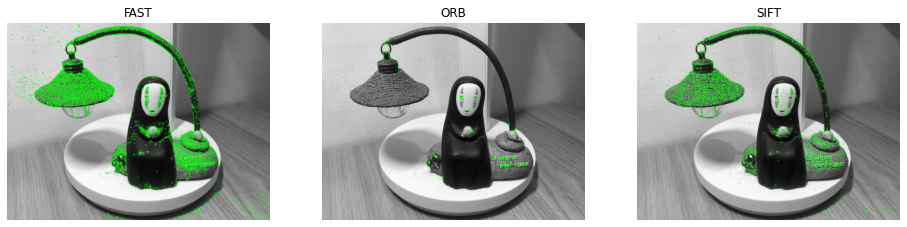

In [10]:
img1_gray = cv2.imread('./test1.jpg', 0)
fast = cv2.FastFeatureDetector_create()
kp_fast = fast.detect(img1_gray, None)
img1_fast = cv2.drawKeypoints(img1_gray, kp_fast, None, color=(0,255,0))

orb = cv2.ORB_create()
kp_orb = orb.detect(img1_gray, None)
img1_orb = cv2.drawKeypoints(img1_gray, kp_orb, None, color=(0,255,0))

sift = cv2.SIFT_create()
kp_sift = sift.detect(img1_gray, None)
img1_sift = cv2.drawKeypoints(img1_gray, kp_sift, None, color=(0,255,0))

fig, ax = plt.subplots(1, 3, figsize=(16,5))
ax[0].imshow(img1_fast)
ax[0].set_title('FAST')
ax[0].axis('off')
ax[1].imshow(img1_orb)
ax[1].set_title('ORB')
ax[1].axis('off')
ax[2].imshow(img1_sift)
ax[2].set_title('SIFT')
ax[2].axis('off')
plt.show()

#### 2. Feature matching (60%)
##### Please match the feature points from the __test1.jpg__ and __test2.jpg__.Also, please apply Lowe's ratio test (with ratio 0.6 and 0.8) to match the features and observe the differences when adjusting the ratio.
##### 2.1 Please use __SIFT__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure2.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure2.jpg?raw=true)


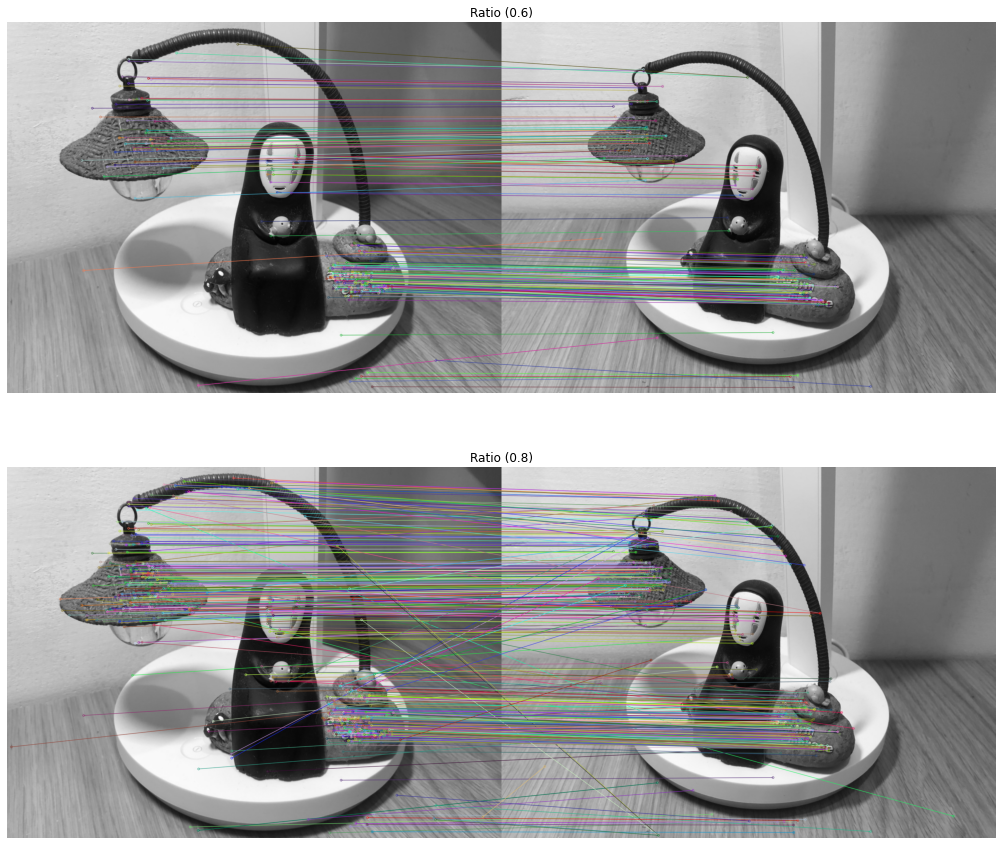

In [14]:
def filter_matches(matches, ratio = 0.6):
    good = []
    for m,n in matches:
        if m.distance < ratio * n.distance:
            good.append([m])
    return good

sift = cv2.SIFT_create()
matcher = cv2.BFMatcher(cv2.NORM_L2)
img1_gray = cv2.imread('./test1.jpg', 0)
img2_gray = cv2.imread('./test2.jpg', 0)
kp1, des1 = sift.detectAndCompute(img1_gray, None)
kp2, des2 = sift.detectAndCompute(img2_gray, None)
raw_matches = matcher.knnMatch(des1, des2, k=2)
good_r6 = filter_matches(raw_matches, ratio=0.6)
good_r8 = filter_matches(raw_matches, ratio=0.8)

fig, ax = plt.subplots(2, 1, figsize=(20,15))
ax[0].imshow(cv2.drawMatchesKnn(img1_gray,kp1,img2_gray,kp2,good_r6,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
ax[0].set_title('Ratio (0.6)')
ax[0].axis('off')
ax[1].imshow(cv2.drawMatchesKnn(img1_gray,kp1,img2_gray,kp2,good_r8,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
ax[1].set_title('Ratio (0.8)')
ax[1].axis('off')
plt.show()


**The number of matching pairs decreases when the ratio is lower, which means that the distance cost of the nearest feature should be significantly smaller than the distance cost of the 2nd one.**

##### 2.2 Please use __ORB__ as feature detector and descriptor.(30%) 
###### (Example figure)
![figure3.jpg](https://github.com/tingyan08/Deep-Learning-and-Computer-Vision/blob/main/HW5/fig/figure3.jpg?raw=true)

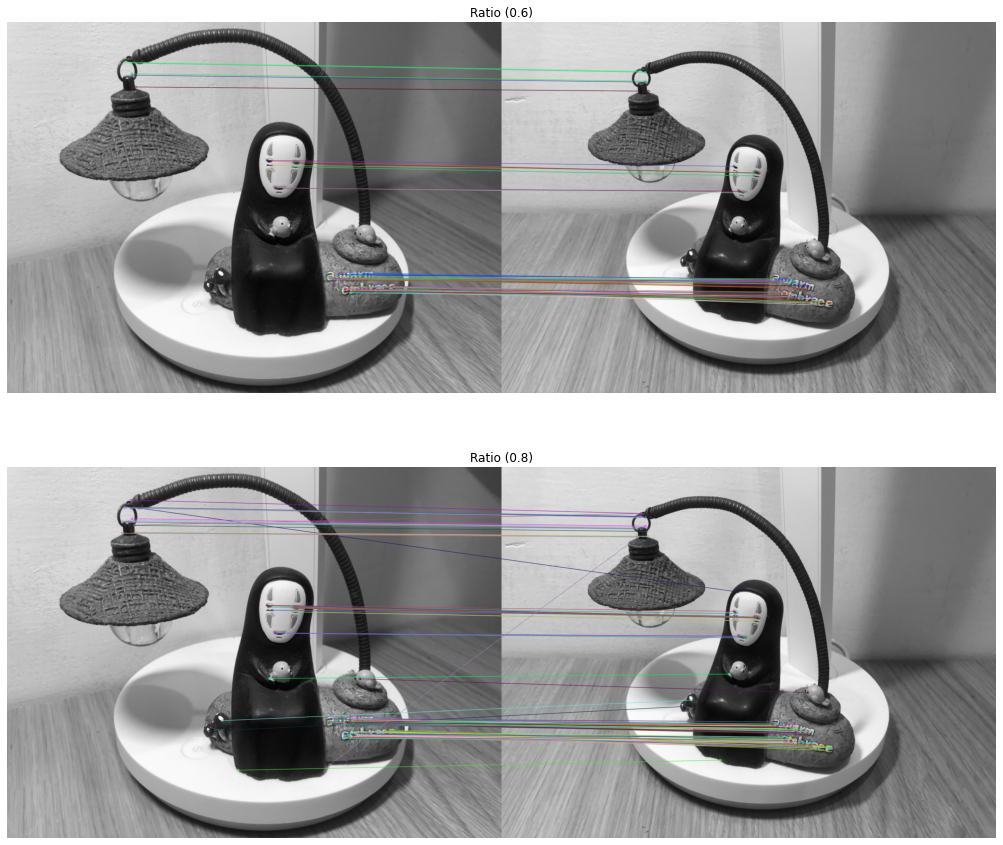

In [16]:
orb = cv2.ORB_create()
matcher = cv2.BFMatcher(cv2.NORM_HAMMING)
img1_gray = cv2.imread('./test1.jpg', 0)
img2_gray = cv2.imread('./test2.jpg', 0)
kp1, des1 = orb.detectAndCompute(img1_gray, None)
kp2, des2 = orb.detectAndCompute(img2_gray, None)
raw_matches = matcher.knnMatch(des1, des2, k=2)
good_r6 = filter_matches(raw_matches, ratio=0.6)
good_r8 = filter_matches(raw_matches, ratio=0.8)

fig, ax = plt.subplots(2, 1, figsize=(20,15))
ax[0].imshow(cv2.drawMatchesKnn(img1_gray,kp1,img2_gray,kp2,good_r6,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
ax[0].set_title('Ratio (0.6)')
ax[0].axis('off')
ax[1].imshow(cv2.drawMatchesKnn(img1_gray,kp1,img2_gray,kp2,good_r8,None,flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS))
ax[1].set_title('Ratio (0.8)')
ax[1].axis('off')
plt.show()
